In [ ]:
#Importing the required packages

import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [ ]:
#Read our data
train=pd.read_csv('/content/drive/MyDrive/M&A TEAM (Mohamed El Mehdi Chbihi & Mohamed Amine Chafik)/train_1.csv',  decimal=',')
test=pd.read_csv('/content/drive/MyDrive/M&A TEAM (Mohamed El Mehdi Chbihi & Mohamed Amine Chafik)/train_1.csv', decimal =',')
train.shape

(10716, 50)

#Exploratory Data Analysis

In [ ]:
#Let's see the types of data we have
train.dtypes

Unnamed: 0        int64
OBJECTID          int64
CMM              object
CM               object
TYPE_            object
NIVEAU           object
GISEMENT         object
TRANCHE          object
ZONE_            object
RAPPORT_MIN      object
MINR_PASSANT     object
X               float64
Y               float64
Z               float64
PT              float64
PP              float64
BPL_B           float64
RP              float64
CO2_B           float64
CAO_B           float64
SIO2_B          float64
FE2O3_B         float64
AL2O3_B         float64
F_B             float64
CORG_B          float64
NA2O_B          float64
K2O_B           float64
MGO_B           float64
CD_B            float64
U_B             float64
AS_B            float64
V_B             float64
ZN_B            float64
TI_B            float64
TR_B            float64
SR_B            float64
CL_B            float64
Mo_B            float64
Cr_B            float64
SIO2_L          float64
MGO_L           float64
CD_L            

In [ ]:
test.dtypes

Unnamed: 0        int64
OBJECTID          int64
CMM              object
CM               object
TYPE_            object
NIVEAU           object
GISEMENT         object
TRANCHE          object
ZONE_            object
RAPPORT_MIN      object
MINR_PASSANT     object
X               float64
Y               float64
Z               float64
PT              float64
PP              float64
RP              float64
CO2_B           float64
CAO_B           float64
SIO2_B          float64
FE2O3_B         float64
AL2O3_B         float64
F_B             float64
CORG_B          float64
NA2O_B          float64
K2O_B           float64
MGO_B           float64
CD_B            float64
U_B             float64
AS_B            float64
V_B             float64
ZN_B            float64
TI_B            float64
TR_B            float64
SR_B            float64
CL_B            float64
Mo_B            float64
Cr_B            float64
SIO2_L          float64
MGO_L           float64
CD_L            float64
CO2_L           

In [ ]:
#We can see that most columns are float, yet there are still some transformations to be made so as to be ablew to use most of the data.

In [ ]:
#We shall remove the OBS column, as it has been assigned to qualitative estimation, and we have been instructed to ignore that

data=train.drop(columns="OBS")
data['LogBPL']=np.log(data['BPL_B'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


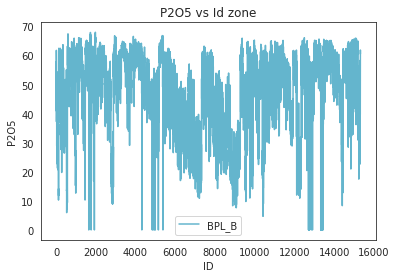

In [ ]:
#plot BPL_B distribution to see how our data varies and whether the fluctuations are high.
data.plot(x='OBJECTID', y='BPL_B', style='c')  
plt.title('P2O5 vs Id zone')  
plt.xlabel('ID')  
plt.ylabel('P2O5')  
plt.show()
#We can see that the results are very widely distibuted

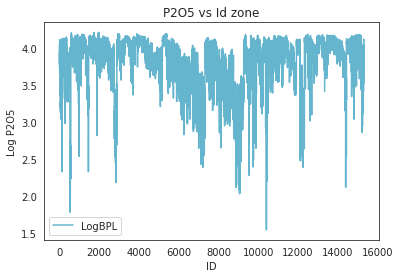

In [ ]:
#plot log(BPL_B) distribution to see whether logarithm will get rid of big fluctuations.
data.plot(x='OBJECTID', y='LogBPL', style='c')  
plt.title('P2O5 vs Id zone')  
plt.xlabel('ID')  
plt.ylabel('Log P2O5')  
plt.show()
#We can see that the results are distibuted with less width, and more "compact".

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


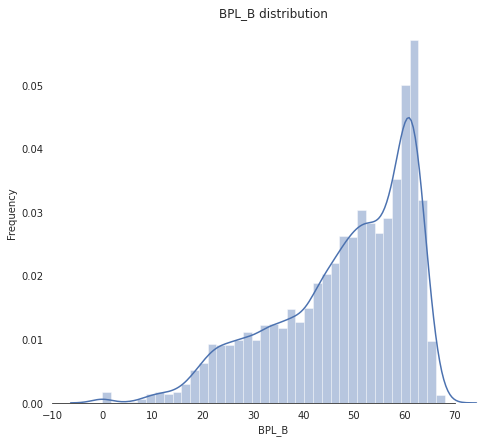

In [ ]:
#Let's now see a density distribution
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['BPL_B'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BPL_B")
ax.set(title="BPL_B distribution")
sns.despine(trim=True, left=True)
plt.show()
#It is obvious that there is a considerable skew in our data.

In [ ]:
#As Machine Learning Models do not perform well on non-normally distributed data, we try to normalize it
#we can perform a log(1+x) transform to solve the problem
train["BPL_B"] = np.log1p(train["BPL_B"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.84 and sigma = 0.40



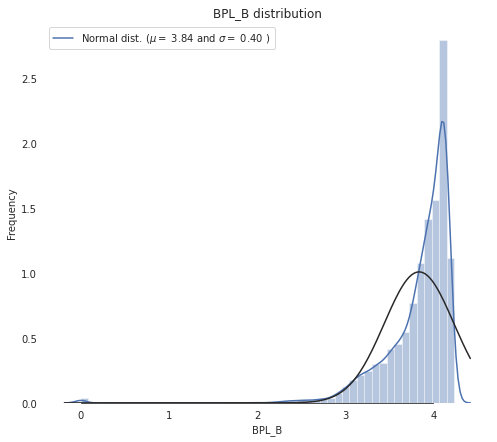

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['BPL_B'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['BPL_B'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BPL_B")
ax.set(title="BPL_B distribution")
sns.despine(trim=True, left=True)

plt.show()

#The approximation seems to be enough, we could consider another log 1+P transform but it would flatten the data too much.

In [ ]:
# Split features and labels
train_labels = train['BPL_B'].reset_index(drop=True)
train_features = train.drop(['BPL_B','Unnamed: 0'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(15310, 49)

In [ ]:
#Since we have some categorical values, which mean their type is object and not float64, we use the getdummies method.
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(15310, 3890)

In [ ]:
train.isna().sum()
#Here, we can see in our training set that two columns have NaN features, which have to be filled.

Unnamed: 0         0
OBJECTID           0
CMM                0
CM                 0
TYPE_              0
NIVEAU             0
GISEMENT           0
TRANCHE         4153
ZONE_           1058
RAPPORT_MIN        0
MINR_PASSANT       0
X                  0
Y                  0
Z                  0
PT                 0
PP                 0
BPL_B              0
RP                 0
CO2_B              0
CAO_B              0
SIO2_B             0
FE2O3_B            0
AL2O3_B            0
F_B                0
CORG_B             0
NA2O_B             0
K2O_B              0
MGO_B              0
CD_B               0
U_B                0
AS_B               0
V_B                0
ZN_B               0
TI_B               0
TR_B               0
SR_B               0
CL_B               0
Mo_B               0
Cr_B               0
SIO2_L             0
MGO_L              0
CD_L               0
CO2_L              0
SO3_B              0
AS_L               0
CL_L               0
SIO2R_B            0
Th_B         

In [ ]:
test.isna().sum()
#same tendency goes for the testing set

Unnamed: 0         0
OBJECTID           0
CMM                0
CM                 0
TYPE_              0
NIVEAU             0
GISEMENT           0
TRANCHE         1775
ZONE_            456
RAPPORT_MIN        0
MINR_PASSANT       0
X                  0
Y                  0
Z                  0
PT                 0
PP                 0
RP                 0
CO2_B              0
CAO_B              0
SIO2_B             0
FE2O3_B            0
AL2O3_B            0
F_B                0
CORG_B             0
NA2O_B             0
K2O_B              0
MGO_B              0
CD_B               0
U_B                0
AS_B               0
V_B                0
ZN_B               0
TI_B               0
TR_B               0
SR_B               0
CL_B               0
Mo_B               0
Cr_B               0
SIO2_L             0
MGO_L              0
CD_L               0
CO2_L              0
SO3_B              0
AS_L               0
CL_L               0
SIO2R_B            0
Th_B               0
ORDRE        

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

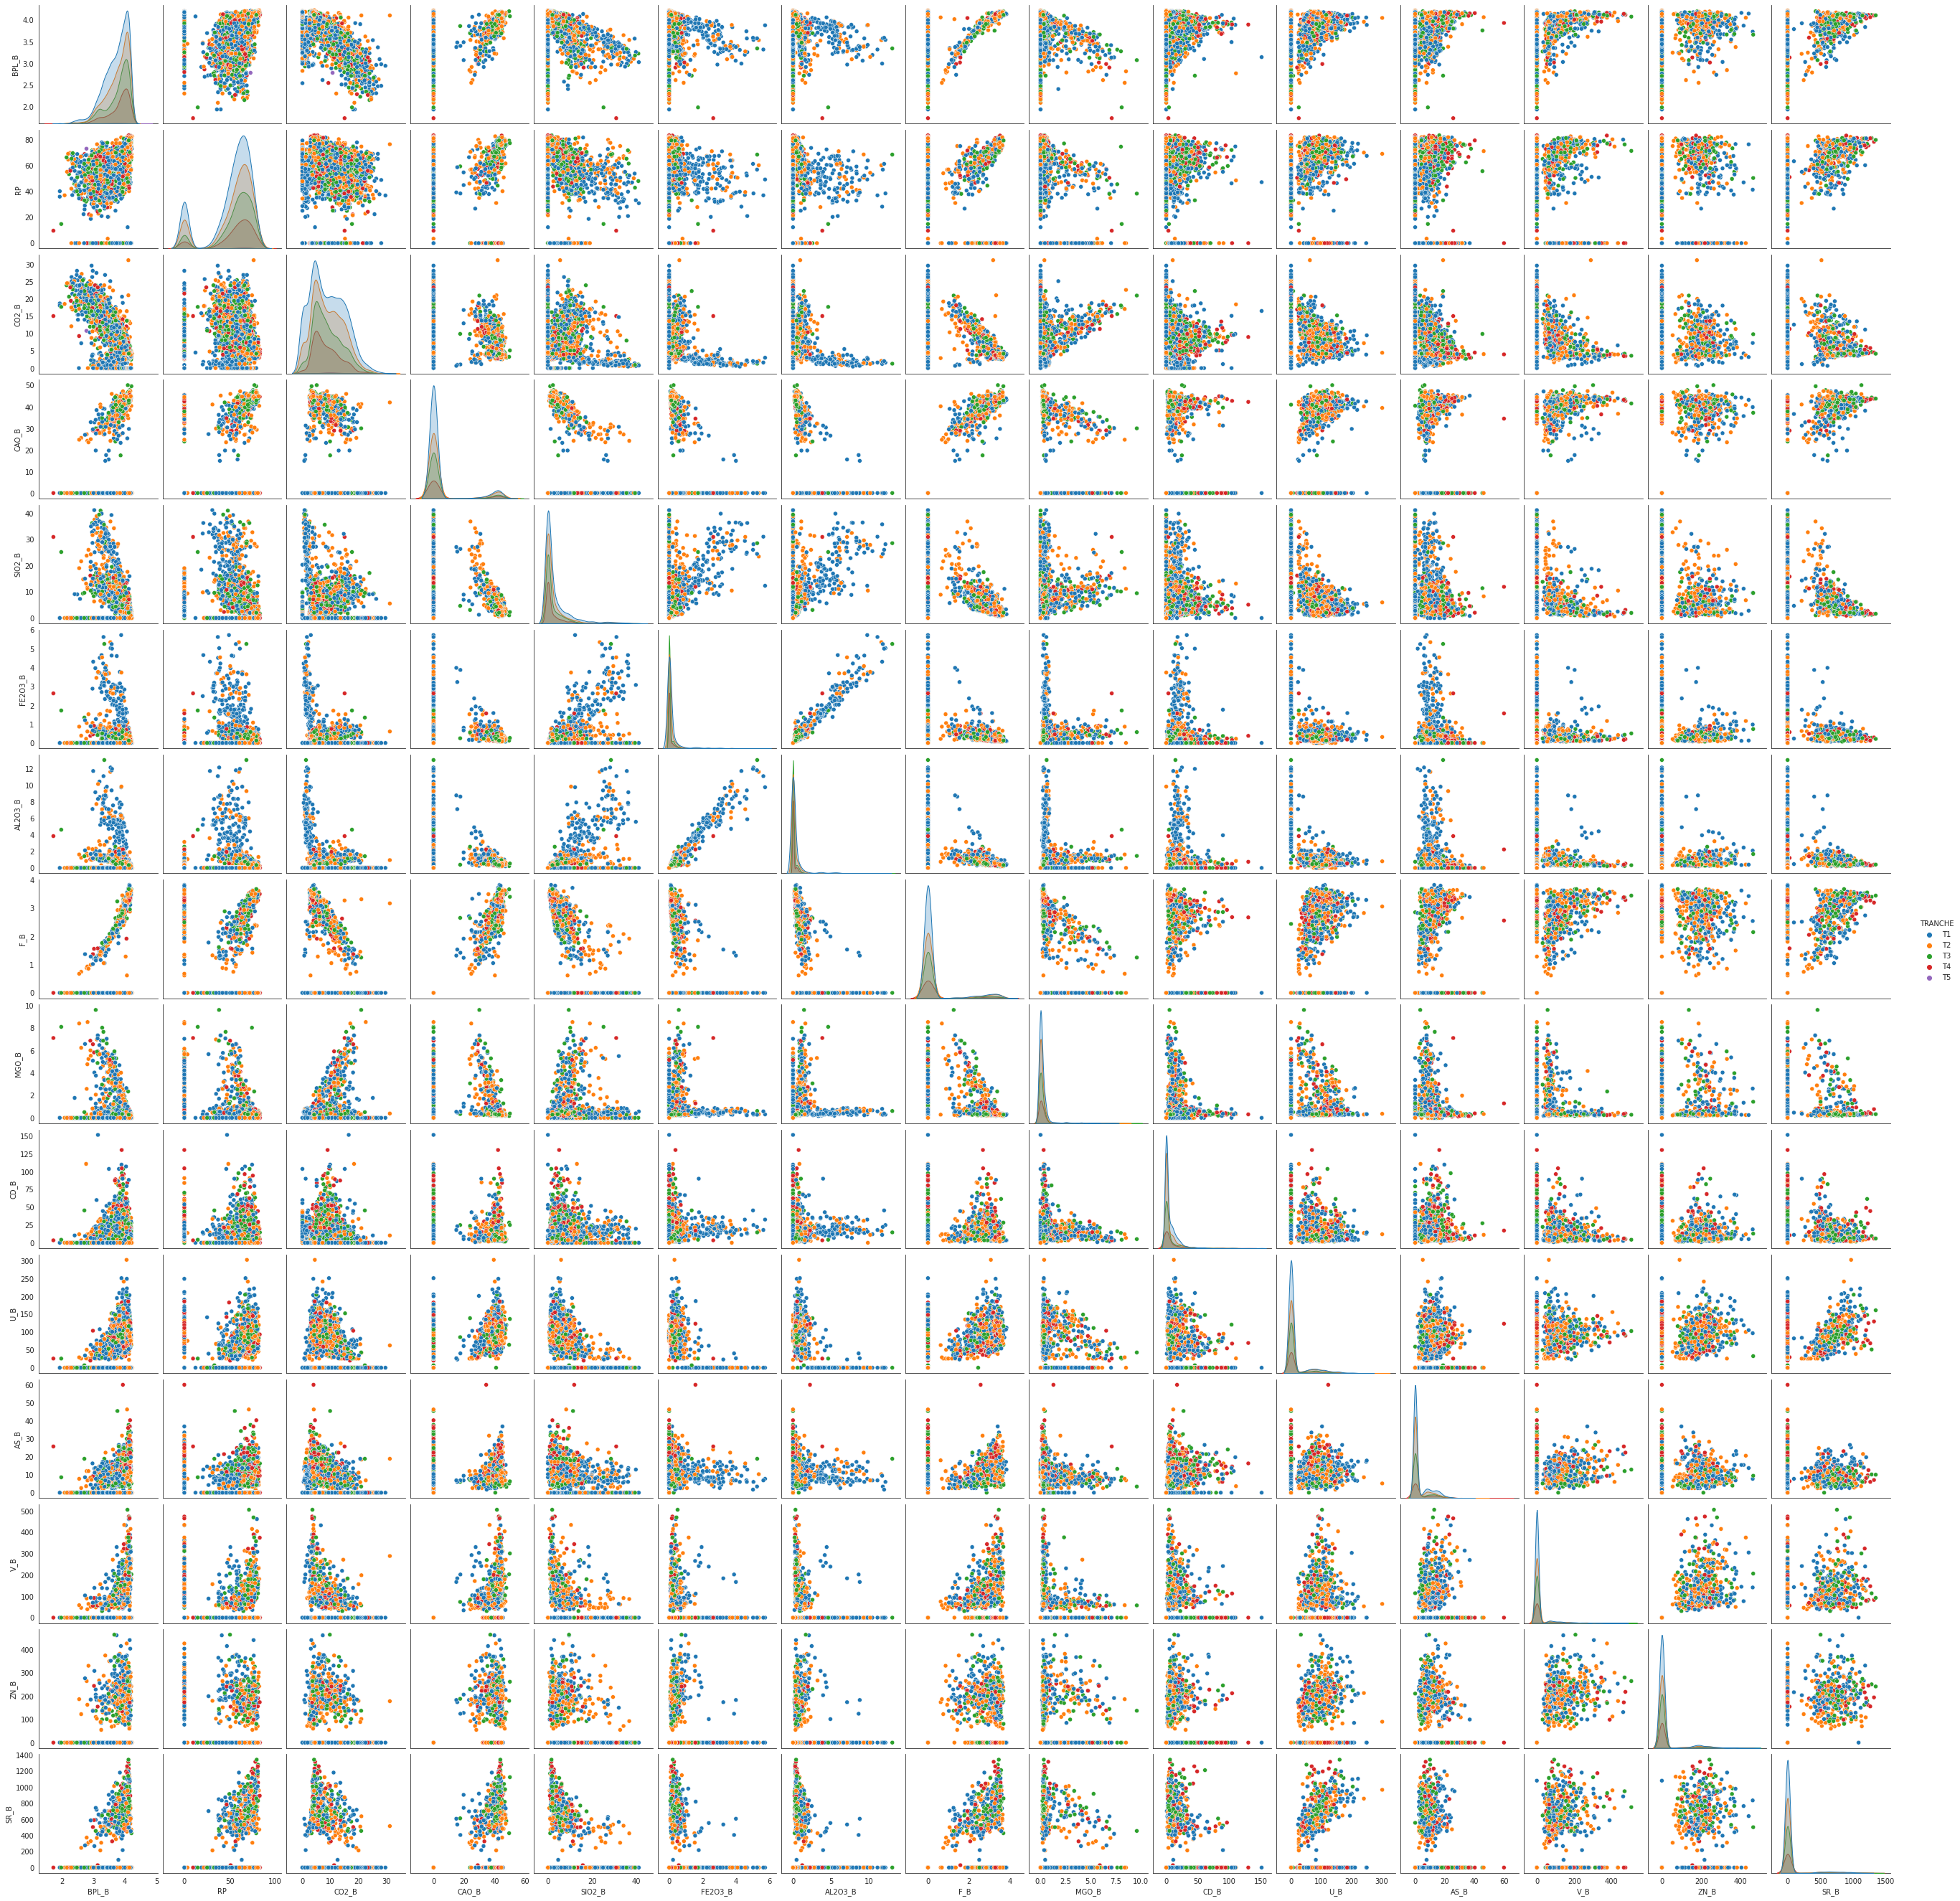

In [ ]:
# Looking for inter-independant variables correlation and linear plots against the BPL_B variable
show = train[['BPL_B','TRANCHE','RP','CO2_B','CAO_B' ,'SIO2_B' ,'FE2O3_B', 'AL2O3_B', 'F_B',  'MGO_B', 'CD_B', 'U_B' 	,'AS_B', 	'V_B', 	'ZN_B','SR_B']]
sns.pairplot(show , hue= "TRANCHE")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

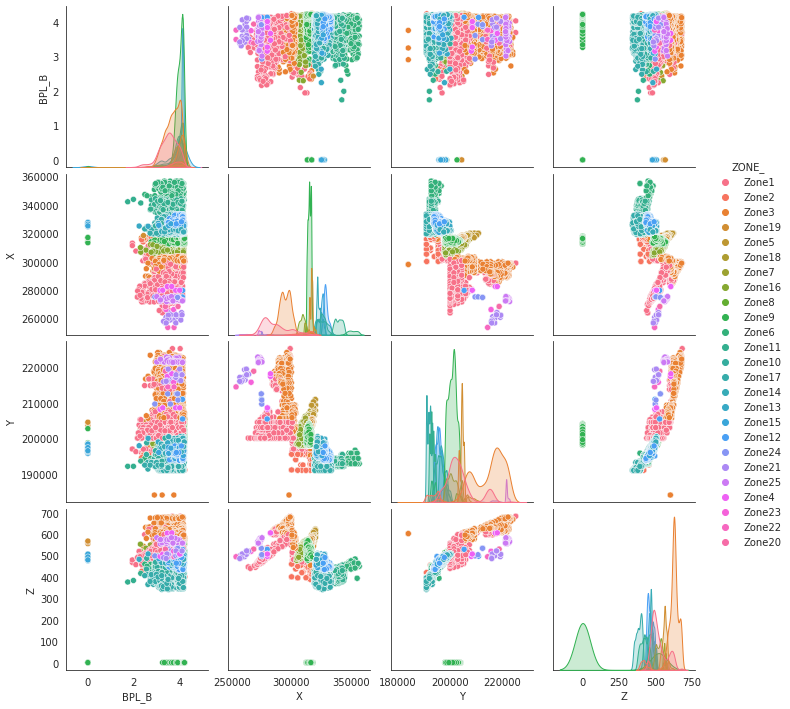

In [ ]:
#Plot the X,Y,Z variables against the BPL_B and hue it with the ZONE_ variable to check the relevance of the data
show = train[['BPL_B','ZONE_','X','Y','Z']]
sns.pairplot(show , hue= "ZONE_")

In [ ]:
train.head()

Unnamed: 0  OBJECTID   CMM     CM      TYPE_    NIVEAU GISEMENT TRANCHE  \
0           1         1  CMM1  CM698  GEOCHIMIE  Niveau 1       G1      T1   
1           3         3  CMM3  CM705  GEOCHIMIE  Niveau 1       G1      T2   
2           6         6  CMM6  CM944  GEOCHIMIE  Niveau 1       G1      T3   
3           7         7  CMM1  CM698  GEOCHIMIE  Niveau 2       G1      T1   
4           9         9  CMM7  CM703  GEOCHIMIE  Niveau 2       G1      T1   

  ZONE_ RAPPORT_MIN MINR_PASSANT            X            Y           Z  \
0   NaN           0            0  262872.4336  196575.5013  476.958012   
1   NaN           0            0  295684.5844  196491.1825  512.956298   
2   NaN           0            0  275408.0120  196147.3693  470.951157   
3   NaN           0            0  262872.4336  196575.5013  476.958012   
4   NaN           0            0  292263.4876  195937.1979  483.033419   

         PT        PP     BPL_B         RP     CO2_B      CAO_B    SIO2_B  \
0  0.514139  0.514139  4.074541  71.465296  4.224507  25.381320  5.235647   
1  0.556984  0.556984  3.925928  67.514996  7.257926  46.289632  6.246787   
2  0.685518  0.685518  3.807272  60.119966  9.468723   0.000000  0.000000   
3  0.257069  0.257069  3.862433  66.221080  8.449015  23.281919  6.529563   
4  0.514139  0.471294  3.956716  67.009426  5.544130   0.000000  0.000000   

    FE2O3_B   AL2O3_B       F_B  CORG_B  NA2O_B  K2O_B     MGO_B       CD_B  \
0  0.214225  0.402742  3.333333     0.0     0.0    0.0  0.454156   4.284490   
1  0.154242  0.616967  2.887746     0.0     0.0    0.0  0.462725  12.853470   
2  0.000000  0.000000  0.000000     0.0     0.0    0.0  0.000000   0.000000   
3  0.162811  0.625536  2.716367     0.0     0.0    0.0  1.945159   5.141388   
4  0.000000  0.000000  0.000000     0.0     0.0    0.0  0.000000   0.000000   

          U_B      AS_B         V_B        ZN_B  TI_B  TR_B        SR_B  CL_B  \
0  103.684662  9.425878  199.657241  226.221080   0.0   0.0  838.046272   0.0   
1  110.539846  7.712082   94.258783  105.398458   0.0   0.0  754.070266   0.0   
2    0.000000  0.000000    0.000000    0.000000   0.0   0.0    0.000000   0.0   
3   89.117395  7.712082   71.979434  183.376178   0.0   0.0  698.371894   0.0   
4    0.000000  0.000000    0.000000    0.000000   0.0   0.0    0.000000   0.0   

   Mo_B  Cr_B  SIO2_L     MGO_L  CD_L  CO2_L  SO3_B  AS_L  CL_L  SIO2R_B  \
0   0.0   0.0     0.0  0.248500   0.0    0.0    0.0   0.0   0.0      0.0   
1   0.0   0.0     0.0  0.334190   0.0    0.0    0.0   0.0   0.0      0.0   
2   0.0   0.0     0.0  7.754927   0.0    0.0    0.0   0.0   0.0      0.0   
3   0.0   0.0     0.0  0.471294   0.0    0.0    0.0   0.0   0.0      0.0   
4   0.0   0.0     0.0  0.000000   0.0    0.0    0.0   0.0   0.0      0.0   

   Th_B     ORDRE OBS  
0   0.0  5.998286   0  
1   0.0  5.998286   0  
2   0.0  5.998286   0  
3   0.0  9.425878   0  
4   0.0  9.425878   0

In [ ]:
all_features['ZONE_'] = all_features['ZONE_'].astype(object).where(all_features['ZONE_'].notnull(),np.nan)
all_features['TRANCHE'] = all_features['TRANCHE'].astype(object).where(all_features['TRANCHE'].notnull(),np.nan)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
all_features = pd.DataFrame(imputer.fit_transform(all_features),columns = all_features.columns)
#Since we can see that there are the correlations we have seen, and given the dense neighbourhood
#here, we proceed to eliminate all missing values by using the KNN imputer technique with a base of the 5 closest numbers so as to shorten the runtime while remaining precise.

In [ ]:
# Remove any duplicated column names
all_features = all_features.loc[:,~all_features.columns.duplicated()]

#Model Fitting and Predictions


In [ ]:
#Splitting the dataset
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

In [ ]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [ ]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
#Here, We define the models that will be used
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.02, 
                       n_estimators=250000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
#Extreme Gradients Boost (a.k.a XGBOOST)
xgboost = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,subsample=0.8,
                          alpha = 10, n_estimators = 555,max_depth=10,booster= 'gbtree',nthread=4,seed=45)
#Random Forest
rf = RandomForestRegressor(n_estimators=555,
                          random_state=42)

In [ ]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)
print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)

In [ ]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.5 * xgb_model_full_data.predict(X)) + \
            (0.35 * lgb_model_full_data.predict(X)) + \
            (0.15 * rf_model_full_data.predict(X)))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_predt2=blended_predictions(X)
df = pd.DataFrame({'OBJECTID': train.OBJECTID, 'BPL_B pred': np.exp(y_predt2)-1, 'BPL_B real' : np.exp(train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predt2)-1, np.exp(train.BPL_B)-1)
rmse = math.sqrt(mse)
print('blended RMSE is :',rmse)
y_predt3=lightgbm.predict(X)
df = pd.DataFrame({'OBJECTID': train.OBJECTID, 'BPL_B pred': np.exp(y_predt3)-1, 'BPL_B real' : np.exp(train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predt3)-1, np.exp(train.BPL_B)-1)
rmse = math.sqrt(mse)
print('lgbm RMSE is :',rmse)
y_predt5=rf.predict(X)
df = pd.DataFrame({'OBJECTID': train.OBJECTID, 'BPL_B pred': np.exp(y_predt5)-1, 'BPL_B real' : np.exp(train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predt5)-1, np.exp(train.BPL_B)-1)
rmse = math.sqrt(mse)
print('Random Forest RMSE is :', rmse)
y_predt4=xgboost.predict(X)
df = pd.DataFrame({'OBJECTID': train.OBJECTID, 'BPL_B pred': np.exp(y_predt4)-1, 'BPL_B real' : np.exp(train.BPL_B)-1})
mse = mean_squared_error(np.exp(y_predt4)-1, np.exp(train.BPL_B)-1)
rmse = math.sqrt(mse)
print('xgboost RMSE is :', rmse)

In [ ]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [ ]:
y_pred2=blended_predictions(X_test)
submission = pd.read_csv("/content/drive/MyDrive/Mohamed El Mehdi Chbihi/Submission_sample_1.csv", sep=';')
df = pd.DataFrame({'OBJECTID': submission.OBJECTID, 'BPL_B': np.exp(y_pred2)-1})
df.to_csv("submission_regression2testlog1pFinaMercredi1.csv", index=False)
df.head(25)